# A - F7 : Représentation de graphes CORRECTION

## AFVM1 : 
On considère le graphe dessiné ci-dessous.

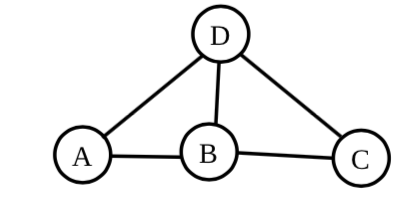

a) Écrire la liste d'adjacence de ce graphe (dictionnaire en Python où les clés sont les sommets).


In [1]:
L = {"A":["B","D"],"B":["A","C","D"], "C":["B","D"],"D":["A","B","C"]}

b) Écrire une fonction `sommets` qui prend en paramètres un sommet `s` et un graphe `g`, sous la forme d’une liste d'adjacence, et renvoie la liste des sommets liés par une arête au sommet `s`.

In [2]:
def sommets(s,g):
    return g[s]
sommets("B",L)

['A', 'C', 'D']

## AFVM2 :
On représente le réseau autoroutier entre les villes de Rennes (R), Angers (A), Tours (T), Le Mans (M), Paris (P), Lyon (L) et Grenoble (G) à l’aide d’un graphe. Les villes sont les sommets du graphe et les (auto)routes sont représentées par les arêtes du graphe. Les distances entre les villes sont indiquées sur les arêtes.

<div>
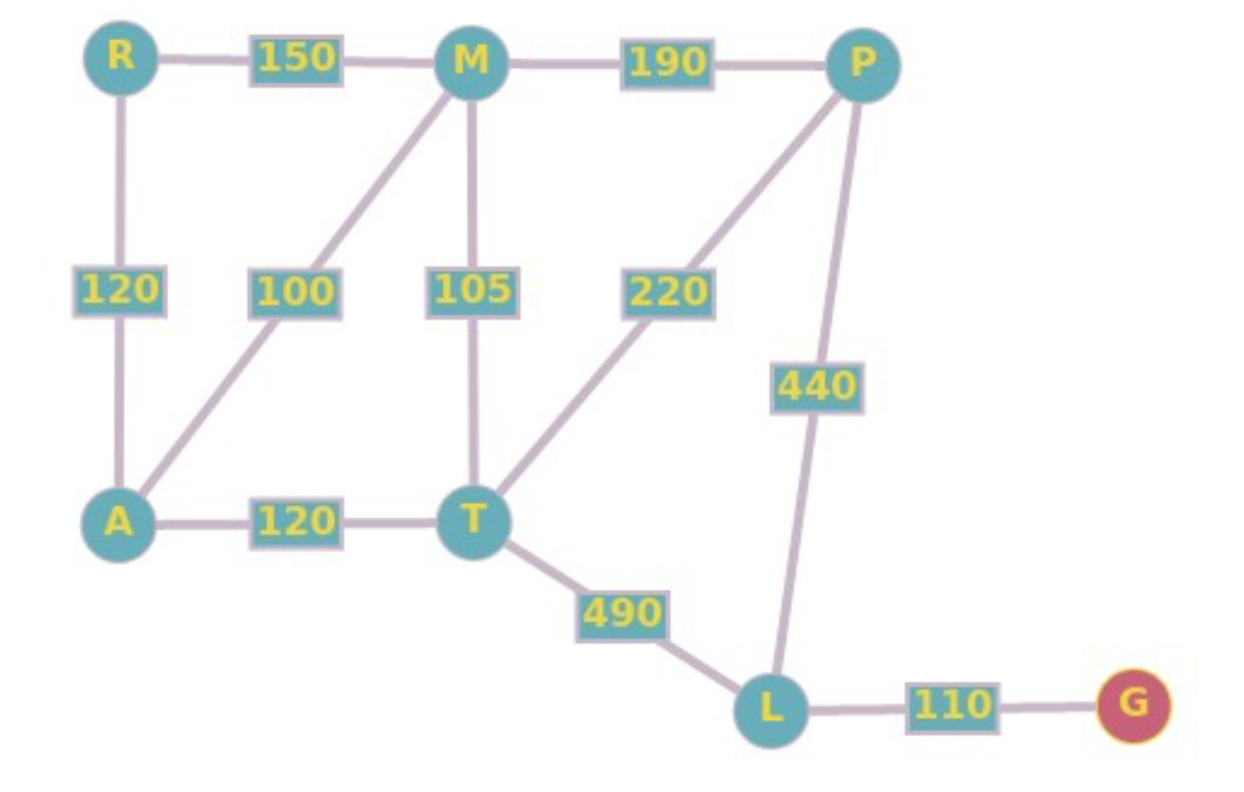
</div>



a) Implémenter ce graphe en Python, sous forme d’une matrice d’adjacence. On utilise l’ordre alphabétique des lettres (M pour Le Mans, par exemple) pour classer les villes.

In [2]:
ville = [[0  , 0  , 0  , 100, 0  , 120, 120],   #A
         [0  , 0  , 110, 0  , 0  , 0  , 0  ],   #G
         [0  , 110, 0  , 0  , 440, 0  , 490],   #L
         [100, 0  , 0  , 0  , 190, 150, 105],   #M 
         [0  , 0  , 440, 190, 0  , 0  , 220],   #P
         [120, 0  , 0  , 150, 0  , 0  , 0  ],   #R
         [120, 0  , 490, 105, 220, 0  , 0  ]    #T
        ]

b) Écrire une fonction `matrice2liste(matrice,liste_villes)` prenant pour paramètres d’entrée :
* la matrice d'adjacence ;
* la liste de noms des villes, dans l’ordre de la matrice.

La fonction doit renvoyer un dictionnaire dont les clés sont les sommets et les valeurs sont un tableau de tuples au format `('Nom', distance)`.
Exemple : `A` est reliée à ` M`, `R` et `T`. Le dictionnaire commencera par `{'A':[('M',100), ('R', 120), ('T', 120)] ...}`.

In [6]:
def matrice2liste(matrice,liste_villes):
    """IN : matrice d'adjacence (list[list]) et la liste de noms des villes, dans l’ordre de la matrice
    OUT : liste d'adjacence du graphe (dict)"""
    liste_adj = {}
    n  = len(matrice) #matrice carrée : même nombre de lignes et de colonnes (nombre de sommets)
    for i in range(n):
        sommet = liste_villes[i]
        liste_adj[sommet] = []
        for j in range(n):  
            distance = matrice[i][j]
            if distance != 0:
                liste_adj[sommet].append((liste_villes[j],distance))
    return  liste_adj  
matrice2liste(ville, ["A","G","L","M","P","R","T"])

{'A': [('M', 100), ('R', 120), ('T', 120)], 'G': [('L', 110)], 'L': [('G', 110), ('P', 440), ('T', 490)], 'M': [('A', 100), ('P', 190), ('R', 150), ('T', 105)], 'P': [('L', 440), ('M', 190), ('T', 220)], 'R': [('A', 120), ('M', 150)], 'T': [('A', 120), ('L', 490), ('M', 105), ('P', 220)]}

c)  On considère à présent le graphe représentant les mêmes villes, mais les sommets sont désormais pondérés par le temps de parcours en minutes. Voici la liste d'adjacence au format dictionnaire tel que décrit plus haut :
   
    {'A': [('M', 65), ('R', 90), ('T', 80)],
     'G': [('L', 70)],
     'L': [('G', 70), ('P', 230), ('T', 260)],
     'M': [('A', 65), ('P', 95), ('R', 90), ('T', 55)],
     'P': [('L', 230), ('M', 95), ('T', 130)],
     'R': [('A', 90), ('M', 90)],
     'T': [('A', 80), ('L', 260), ('M', 55), ('P', 130)]}
     
 
Écrire une fonction `liste2matrice(dico)` prenant en paramètre un graphe donné par une liste d'adjacence sous format dictionnaire comme ci-dessus, et renvoyant deux tableaux :
* la liste des sommets ;
* la matrice d'adjacence du graphe.


In [11]:
def liste2matrice(dico):
    """IN : graphe donné par une liste d'adjacence (dict)
    OUT : liste des sommets ; la matrice d'adjacence du graphe."""
    liste_villes = list(dico.keys())
    n = len(liste_villes)
    M = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        sommet = liste_villes[i]
        liste = dico[sommet]
        for j in range(n):
            for k in range(len(liste)) : 
                if  liste_villes[j] == liste[k][0]: 
                    M[i][j] = liste[k][1]
    return liste_villes,M

G = {'A': [('M', 65), ('R', 90), ('T', 80)],
 'G': [('L', 70)],
 'L': [('G', 70), ('P', 230), ('T', 260)],
 'M': [('A', 65), ('P', 95), ('R', 90), ('T', 55)],
 'P': [('L', 230), ('M', 95), ('T', 130)],
 'R': [('A', 90), ('M', 90)],
 'T': [('A', 80), ('L', 260), ('M', 55), ('P', 130)]}

liste2matrice(G)

(['A', 'G', 'L', 'M', 'P', 'R', 'T'], [[0, 0, 0, 65, 0, 90, 80], [0, 0, 70, 0, 0, 0, 0], [0, 70, 0, 0, 230, 0, 260], [65, 0, 0, 0, 95, 90, 55], [0, 0, 230, 95, 0, 0, 130], [90, 0, 0, 90, 0, 0, 0], [80, 0, 260, 55, 130, 0, 0]])

## AFVM3 : 
a) Écrire une fonction qui prend en entrée une liste d’adjacence d’un graphe non orienté, et qui renvoie :
* le nombre de sommets ;
* le nombre d’arêtes ;
* le sommet le plus relié.

In [13]:
def f(dico_adjacence):
    """IN : liste d’adjacence d’un graphe non orienté,
    OUT le nombre de sommets ; le nombre d’arêtes ; le sommet le plus relié. """
    n_sommet = 0
    n_aretes = 0
    n_aretes_max = 0
    for sommet in dico_adjacence.keys():
        n_sommet = n_sommet + 1
        n_aretes = len(dico_adjacence[sommet])
        if n_aretes > n_aretes_max:
            sommet_max = sommet
            n_aretes_max = n_aretes
    return n_sommet,n_aretes,sommet_max

f(G)

(7, 4, 'M')

b) Écrire la même fonction, mais qui prend en entrée la matrice d’adjacence d’un graphe non orienté.

In [15]:
def g(matrice_adjacence):
    """IN : matrice d’adjacence d’un graphe non orienté,
    OUT le nombre de sommets ; le nombre d’arêtes ; le sommet le plus relié. """
    n_sommet = len(matrice_adjacence)
    n_aretes_total = 0
    n_aretes_max = 0
    for i in range(n_sommet):
        n_aretes = 0
        for j in range(n_sommet):
            if matrice_adjacence[i][j] != 0:
                n_aretes = n_aretes +1
        n_aretes_total += n_aretes
        if n_aretes > n_aretes_max:
            sommet_max = i
            n_aretes_max = n_aretes
        
    return n_sommet,n_aretes,sommet_max        
g(ville)       

(7, 4, 3)

## AFVM4 :
On considère la classe `Graphe` définie ci-dessous.
   
    class Graphe :
       def __init__(self, n) :
           self.n = n
           self.mat = [[False] * n for _ in range(n)]
           
a) Écrire la méthode `ajouter_arc(self, s1, s2)` qui permet d’ajouter l’arc d’origine `s1` et d’extrémité `s2`.


In [20]:
class Graphe :
    def __init__(self, n) :
        self.n = n
        self.mat = [[False] * n for _ in range(n)]
        
    def ajouter_arc(self, s1, s2):
        self.mat[s1][s2] = True
        
    def __str__(self):
        resultat = ""
        for i in range(self.n):
            resultat += str(self.mat[i])+"\n"
        return resultat

G = Graphe(3)
G.ajouter_arc(1,2)
print(G)

[False, False, False]
[False, False, True]
[False, False, False]



b) Écrire la méthode `arc(self, s1, s2)` qui renvoie `True` s’il existe un arc d’origine `s1` et d’extrémité `s2`, `False` sinon.


In [21]:
class Graphe :
    def __init__(self, n) :
        self.n = n
        self.mat = [[False] * n for _ in range(n)]
        
    def ajouter_arc(self, s1, s2):
        self.mat[s1][s2] = True
    
    def arc(self, s1, s2):
        return self.mat[s1][s2]
        

G = Graphe(3)
G.ajouter_arc(1,2)
print(G.arc(0,1))

False


c) Écrire la méthode `voisins(self, s)` qui renvoie la liste des voisins du sommet `s`.


In [22]:
class Graphe :
    def __init__(self, n) :
        self.n = n
        self.mat = [[False] * n for _ in range(n)]
        
    def ajouter_arc(self, s1, s2):
        self.mat[s1][s2] = True
        
    def arc(self, s1, s2):
        return self.mat[s1][s2]
    
    def voisins(self, s):
        liste_voisins = []
        ligne = self.mat[s]
        for j in range(self.n):
            if ligne[j]:
                liste_voisins.append(j)
        return liste_voisins

G = Graphe(3)
G.ajouter_arc(1,2)
G.ajouter_arc(1,0)
print(G.voisins(1))

[0, 2]


d) Écrire la méthode `afficher(self)` qui permet d’afficher ligne à ligne la suite des sommets puis `->` et leurs successeurs.


In [25]:
class Graphe :
    def __init__(self, n) :
        self.n = n
        self.mat = [[False] * n for _ in range(n)]
        
    def ajouter_arc(self, s1, s2):
        self.mat[s1][s2] = True
        
    def arc(self, s1, s2):
        return self.mat[s1][s2]
    
    def voisins(self, s):
        liste_voisins = []
        ligne = self.mat[s]
        for j in range(self.n):
            if ligne[j]:
                liste_voisins.append(j)
        return liste_voisins
    
    def afficher(self):
        for i in range(self.n):
            print(i,"->",self.voisins(i))

G = Graphe(3)
G.ajouter_arc(1,2)
G.ajouter_arc(1,0)
G.afficher()

0 -> []
1 -> [0, 2]
2 -> []


e) Écrire la méthode `nb_sommets(self)` qui donne le nombre de sommets du graphe.


f) Écrire la méthode `degre(self, s)` qui donne le nombre de voisins du sommet `s`.


g) Écrire la méthode `nb_arcs(self)` qui donne le nombre total d’arcs du graphe.


h) Écrire une méthode `supprimer_arc(self, s1, s2)` qui supprime du graphe l’arc d’origine `s1` et d’extrémité `s2`.

i) Tester vos méthodes !

In [33]:
class Graphe :
    def __init__(self, n) :
        self.n = n
        self.mat = [[False] * n for _ in range(n)]
        
    def ajouter_arc(self, s1, s2):
        self.mat[s1][s2] = True
        
    def arc(self, s1, s2):
        return self.mat[s1][s2]
    
    def voisins(self, s):
        liste_voisins = []
        ligne = self.mat[s]
        for j in range(self.n):
            if ligne[j]:
                liste_voisins.append(j)
        return liste_voisins
    
    def afficher(self):
        for i in range(self.n):
            print(i,"->",self.voisins(i))
    
    def nb_sommets(self):
        return self.n
    
    def degre(self, s):
        return len(self.voisins(s))
    
    def nb_arcs(self):
        n = 0
        for i in range(self.n):
            n = n + self.degre(i)
        return n
    
    def supprimer_arc(self, s1, s2):
        self.mat[s1][s2] = False

G = Graphe(3)
G.ajouter_arc(1,2)
G.ajouter_arc(1,0)
G.ajouter_arc(0,2)
G.afficher()
print("nombre de sommets: ",G.nb_sommets())
print("nombre d'arcs: ",G.nb_arcs())
G.supprimer_arc(0,2)
G.afficher()

0 -> [2]
1 -> [0, 2]
2 -> []
nombre de sommets:  3
nombre d'arcs:  3
0 -> []
1 -> [0, 2]
2 -> []
